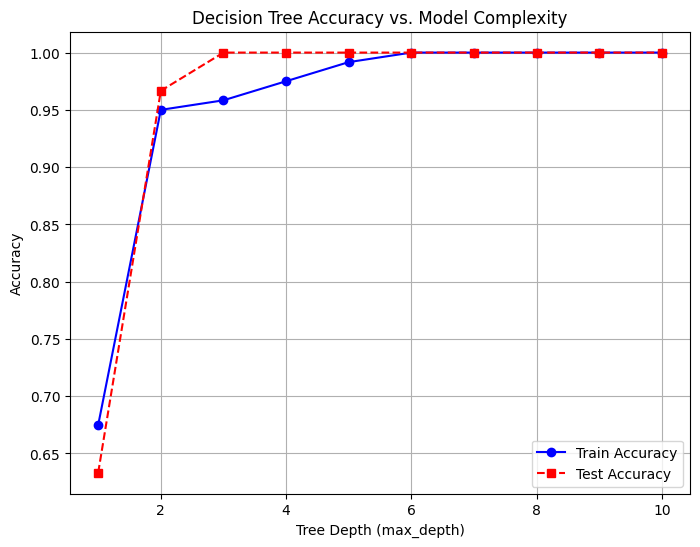

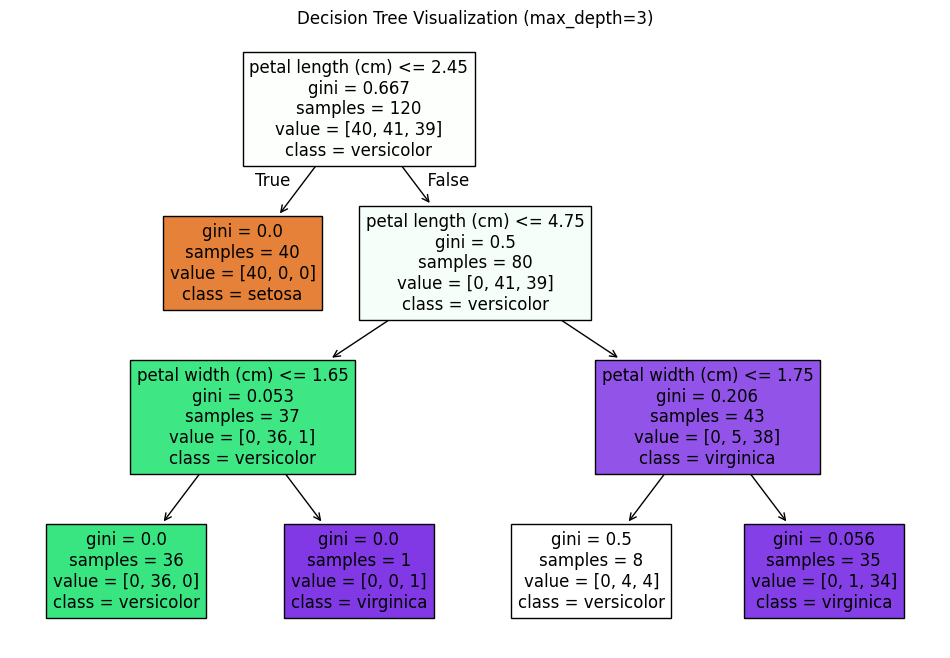

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
# Load dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Vary max_depth and record accuracies
depths = range(1, 11) # Testing max_depth from 1 to 10
train_accuracies = []
test_accuracies = []
models = {}
for depth in depths:
  dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
  dt.fit(X_train, y_train)
# Store model for visualization later
  models[depth] = dt
# Train and test accuracy
  train_accuracies.append(accuracy_score(y_train, dt.predict(X_train)))
  test_accuracies.append(accuracy_score(y_test, dt.predict(X_test)))
# Plot accuracy vs model complexity (max_depth)
plt.figure(figsize=(8, 6))
plt.plot(depths, train_accuracies, marker='o', linestyle='-', color='blue', label='Train Accuracy')
plt.plot(depths, test_accuracies, marker='s', linestyle='--', color='red', label='Test Accuracy')
plt.xlabel("Tree Depth (max_depth)")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy vs. Model Complexity")
plt.legend()
plt.grid(True)
plt.show()
# Choose the best depth (or visualize last trained model)
best_depth = depths[test_accuracies.index(max(test_accuracies))]
best_tree = models[best_depth]
# Plot Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(best_tree, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title(f"Decision Tree Visualization (max_depth={best_depth})")
plt.show()
